# Getting Started Code for [Chunin Exams Food Track- CV'2021](https://www.aicrowd.com/challenges/chunin-exams-food-track-cv-2021) on AIcrowd
#### Author : Pulkit Gera

## Download Necessary Packages 📚

In [ ]:
!pip3 install aicrowd-cli

## Download Data
The first step is to download out train test data. We will be training a model on the train data and make predictions on test data. We submit our predictions.


In [3]:
API_KEY = "fd1aed7204268f0bae2780fb808a4063" #Please enter your API Key from [https://www.aicrowd.com/participants/me]
!aicrowd login --api-key $API_KEY

API Key valid
Saved API Key successfully!


In [4]:
!aicrowd dataset download --challenge chunin-exams-food-track-cv-2021

train_images.zip: 100% 754M/754M [00:06<00:00, 110MB/s]
test_images.zip: 100% 33.9M/33.9M [00:00<00:00, 84.0MB/s]
train.csv: 100% 253k/253k [00:00<00:00, 3.71MB/s]
test.csv: 100% 7.27k/7.27k [00:00<00:00, 773kB/s]


In [ ]:
!mkdir data
!mkdir data/test
!mkdir data/train
!unzip train_images -d data/train
!unzip test_images -d data/test

importing required library for this pretrained model

In [6]:
import pandas as pd
import numpy as np
import cv2
import os
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from keras.optimizers import Adam,SGD,RMSprop
from glob import glob
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0

reading 'train.csv' using pandas dataframe

In [7]:
train = pd.read_csv('train.csv')

Extracting  labels and counting number of unique labels in tha train.csv

In [10]:
from sklearn import preprocessing
labelEncod = preprocessing.LabelEncoder()
targets = labelEncod.fit_transform(train['ClassName'])
np.unique(targets),len(targets)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60]), 9323)

Extracting image name from the train.csv

In [11]:
train_img_name=train['ImageId']
# train_img_name

Appending path with image name in train_path list which are used for reading , resizing into required format

In [12]:
X_data_path='/content/data/train/train_images'
train_paths = []
for i in range(len(train_img_name)):
  train_paths.append(os.path.join(X_data_path,train_img_name[i]))
len(train_paths),train_paths[0]

(9323, '/content/data/train/train_images/f27632d7e5.jpg')

Appending path image name in y_data_path list for reading and computing submission csv for submiting purpose

In [14]:
y_data_path='/content/data/test/test_images'
test_paths = glob(os.path.join(y_data_path,'*.jpg'))
len(test_paths),test_paths[0]

(484, '/content/data/test/test_images/f8961bffbe.jpg')

Reading image for confirmation purpose ,and checking iamge_path are correct or not

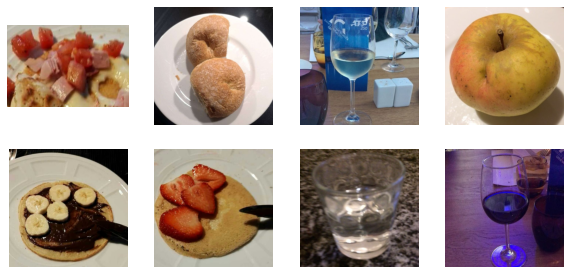

In [13]:
plt.figure(figsize=(10,10))
for i in range(8):
  image = cv2.imread(train_paths[i+54])
  image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  plt.subplot(4,4,i+1)
  plt.axis('off')
  plt.imshow(image)

list data are converted in numpy ndarray 

In [ ]:
train_paths=np.array(train_paths)
targets=np.array(targets)

Created function for resize and reading image using open cv

In [15]:
def readImage(data):
  data_=[]
  for d in data:
    im= cv2.imread(d)
    im = cv2.resize(im, (224,224))
    data_.append(im)
  return np.array(data_)

Readed image for training purpose of our model

In [ ]:
X_train_img = readImage(train_paths)

data augmentation before training the model so that model clasify correctly , in this aumenation techinuque we  used rotation, flip, scaling and translation

In [18]:
img_augmentation = Sequential(
    [
        preprocessing.RandomRotation(factor=0.15),
        preprocessing.RandomTranslation(height_factor=0.1, width_factor=0.1),
        preprocessing.RandomFlip(),
        preprocessing.RandomContrast(factor=0.1),
    ],
    name="img_augmentation",
)

here we used pretrained model for classification purpose, in this model required input size is (224,224,3), this  are called as Efficentnet0 it is a basic model of the efficennet0 series

In this mode uses optimizer as Adam and using sparsecategorical crossentropy becuse label are int normal format not onehot format otherwise we use categorical_crossentropy as a loss function

In [19]:
inputs = layers.Input(shape=(224,224,3))
x = img_augmentation(inputs)
outputs = EfficientNetB0(include_top=True, weights=None, classes=61)(x)
model = tf.keras.Model(inputs, outputs)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
img_augmentation (Sequential (None, 224, 224, 3)       0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, 61)                4127712   
Total params: 4,127,712
Trainable params: 4,085,689
Non-trainable params: 42,023
_________________________________________________________________


In [ ]:
history = model.fit(X_train_img,targets,epochs=12)

Epoch 1/12
292/292 [==============================] - 535s 2s/step - loss: 4.0463 - accuracy: 0.1257
Epoch 2/12
292/292 [==============================] - 543s 2s/step - loss: 3.1974 - accuracy: 0.2083
Epoch 3/12
292/292 [==============================] - 539s 2s/step - loss: 2.9008 - accuracy: 0.2567
Epoch 4/12
292/292 [==============================] - 513s 2s/step - loss: 2.7180 - accuracy: 0.2856
Epoch 5/12
292/292 [==============================] - 493s 2s/step - loss: 2.5744 - accuracy: 0.3095
Epoch 6/12
292/292 [==============================] - 483s 2s/step - loss: 2.4048 - accuracy: 0.3511
Epoch 7/12
292/292 [==============================] - 480s 2s/step - loss: 2.2684 - accuracy: 0.3745
Epoch 8/12
292/292 [==============================] - 479s 2s/step - loss: 2.1048 - accuracy: 0.4142
Epoch 9/12
292/292 [==============================] - 481s 2s/step - loss: 1.8138 - accuracy: 0.4771
Epoch 10/12
292/292 [==============================] - 578s 2s/step - loss: 1.6326 - accura

Reading image for prediction label of the test image

In [16]:
X_test_ = readImage(test_paths)
X_test_.shape

(484, 224, 224, 3)

Predicted label from the trained model

In [ ]:
y_pred_ = model.predict(X_test_)
y_pred_.shape

(484, 61)

Predicted output is softmax out as shows as a probability ,, and selecting max probability index value  as a label

In [ ]:
y_pred__= [np.argmax(element) for element in y_pred_]
np.array(y_pred__).shape

(484,)

coverting y_pred in actual label format and the converting into csv file for submission purpose 

In [ ]:
df = pd.DataFrame(labelEncod.inverse_transform(y_pred__),columns=['ClassName'])
df.to_csv('submission.csv',index=False)

Now submssion.csv are downloaded from colab storage into lacal storage  

In [ ]:
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>